# Valna jednadžba

---

Valna jednadžba, čije ćemo detalje objasniti kasnije, može se svesti na problem rubnih 
vrijednosti kao u sljedećem primjeru:

$$
u_{tt}=u_{xx},\quad 0<x<\pi\\
u(0,t)=0,\quad u(\pi,t)=0, \quad t>0\\
u(x,0)=f(x),\quad u_t(x,0)=g(x),\quad 0<x<\pi.
$$

Prema klasfikaciji, PDJ je hiperbolička, i može se riješiti separacijom varijabli i svođenjem na SLP.

Funkcija $u(x,t)$ daje položaj (visinu) vala na mjestu $x$ u trenutku $t$ (na primjer, titranje žice čiji su krajevi u ovom slučaju fiksni).

Primijetimo da uz rubne uvjete, kao početne uvjete zadajemo položaj (visinu) i brzinu vala u trenutku $t=0$.


Pretpostavimo da je 

$$
u(x,t)=X(x) \cdot T(t).
$$

Jednadžba glasi

$$
X''\cdot T=X\cdot T'',
$$

odnosno

$$
\displaystyle\frac{X''}{X}=\frac{T''}{T}=-\lambda.
$$

Iz rubnih uvjeta vidimo da možemo definirati regularni SLP po varijabli $x$:

$$
X''=-\lambda X,\quad 0<x<\pi\\
X(0)=0,\quad X(\pi)=0.
$$

Kao i do sada, analizirajmo posebno tri slučaja:

---

Za $\lambda=0$ je $X=ax+b$, $X(0)=b=0$, $X(\pi)=a\pi=0$, pa je $a=b=0$. Dakle, $\lambda_0=0$ nije svojstvena vrijednost.

---

Za $\lambda<0$ je

$$
X=a e^{\sqrt{-\lambda} x} +b e^{-\sqrt{-\lambda}x},
$$

pa prvi rubni uvjet povlači 

$$
X(0)=a+b=0,
$$

odnosno $a=-b$. Drugi uvjet sada glasi 

$$
X(\pi)=a\big(e^{\sqrt{-\lambda} \pi} -e^{-\sqrt{-\lambda}\pi}\big)
$$

pa je $a=b=0$. Funkcija $X=0$ ne može biti svojstvena funkcija pa $\lambda<0$ nije svojstvena vrijednost. 

---

Za $\lambda>0$ je

$$
X=a \sin (\sqrt{\lambda} x) +b \cos (\sqrt{\lambda}x).
$$

Prvi rubni uvjet povlači 

$$
X(0)=b=0.
$$

Drugi uvjet glasi 

$$
X(\pi)=a\sin(\sqrt{\lambda}\pi)=0
$$

pa je $\sqrt{\lambda} \pi=n\pi$. Dakle, $\lambda_n=n^2$, $n\in\mathbb{N}$ su svojstvene vrijednosti, a 
$X_n(x)=\sin (nx)$ su pripadne svojstvene funkcije.

Druga jednadžba sada glasi $T''=-n^2T$ pa je 

$$
T_n= a_n \cos (nt)+b_n \sin (nt).
$$

Prema principu superpozicije vrijedi

$$
u(x,t)=\sum_{n=1}^\infty u_n(x,t)=\sum_{n=1}^\infty X_n(x) T_n(t) \\
= \sum_{n=1}^\infty [a_n \cos (nt)+ b_n \sin(nt)] \sin(nx).
$$

Prvi početni uvjet daje

$$
u(x,0)=\sum_{n=1}^\infty a_n \sin(nx)=f(x)
$$

pa su $a_n=0$ koeficijenti razvoja funkcije $f(x)$ u Fourierov red:

$$
a_n=\frac{(f,\sin (nx))}{(\sin(nx),\sin(nx))}
=\frac{\int\limits_0^\pi f(x)\sin(nx)\, dx}{\int\limits_0^\pi \sin^2(nx)\, dx}.
$$

Drugi početni uvjet daje

$$
u_t(x,0)= \sum_{n=1}^\infty b_n n \sin(nx)=g(x)
$$

pa su $n b_n$ koeficijenti razvoja funkcije $g(x)$ u Fourierov red, odnosno

$$
b_n=\frac{1}{n} \frac{(g,\sin (nx))}{(\sin(nx),\sin(nx))}
=\frac{1}{n}\frac{\int\limits_0^\pi g(x)\sin(nx)\, dx}{\int\limits_0^\pi \sin^2(nx)\, dx}.
$$

Nacrtajmo rješenje problema za $f(x)=\sin(x)$ i $g(x)=x$.

Za simboličko računanje koristimo paket `SymPy.jl`, a za crtanje paket `PyPlot.jl`.

In [1]:
using PyPlot
using SymPy

In [2]:
n=symbols("n",integer=true)

n

In [3]:
f(x)=sin(x)
g(x)=x

g (generic function with 1 method)

In [4]:
a=integrate(x->f(x)*sin(n*x),0,pi)/integrate(x->sin(n*x)^2,0,pi)

                  ⎛⎧-π             ⎞
                  ⎜⎪───  for n = -1⎟
⎛⎧zoo  for n = 0⎞ ⎜⎪ 2             ⎟
⎜⎪              ⎟ ⎜⎪               ⎟
⎜⎨ 2            ⎟⋅⎜⎨ π             ⎟
⎜⎪ ─   otherwise⎟ ⎜⎪ ─   for n = 1 ⎟
⎝⎩ π            ⎠ ⎜⎪ 2             ⎟
                  ⎜⎪               ⎟
                  ⎝⎩ 0   otherwise ⎠

In [5]:
b=integrate(x->g(x)*sin(n*x),0,pi)/integrate(x->sin(n*x)^2,0,pi)/n

⎛⎧    0      for n = 0⎞                  
⎜⎪                    ⎟ ⎛⎧zoo  for n = 0⎞
⎜⎪     n              ⎟ ⎜⎪              ⎟
⎜⎨-(-1) ⋅π            ⎟⋅⎜⎨ 2            ⎟
⎜⎪─────────  otherwise⎟ ⎜⎪ ─   otherwise⎟
⎜⎪    n               ⎟ ⎝⎩ π            ⎠
⎝⎩                    ⎠                  
─────────────────────────────────────────
                    n                    

In [6]:
# Pripremimo mrežu za crtanje
m=50
X=linspace(0,pi,m)
T=linspace(0,5,m)
gridX=repmat(X,1,m)
gridT=repmat(T',m,1);

In [7]:
using Interact

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"l",5,1:10,"d",true)

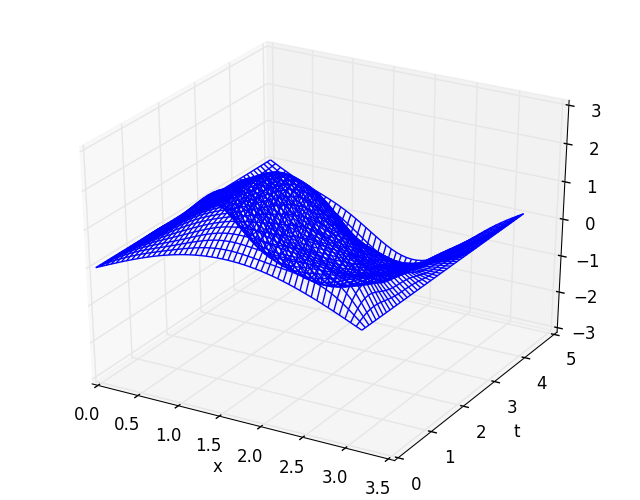

In [8]:
fig=figure()
@manipulate for l=1:10; withfig(fig) do
        u=sum([ (N(a(k))*cos(k*gridT)+N(b(k)).*sin(k*gridT)).*sin(k*gridX) for k in collect(1:l)]) 
        mesh(X'',T',u)
        xlabel("x")
        ylabel("t")
    end
end

In [9]:
# Provjera rubnog uvjeta
x=linspace(0,pi)
y=f(x)
z=sum([N(a(k))*sin(k*x) for k=1:10])

50-element Array{Float64,1}:
 0.0        
 0.0640702  
 0.127877   
 0.191159   
 0.253655   
 0.315108   
 0.375267   
 0.433884   
 0.490718   
 0.545535   
 ⋮          
 0.490718   
 0.433884   
 0.375267   
 0.315108   
 0.253655   
 0.191159   
 0.127877   
 0.0640702  
 1.22465e-16

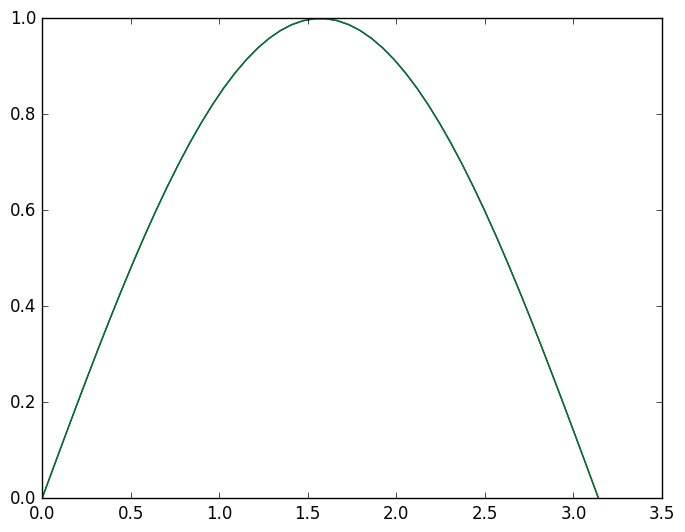

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd22ceba978>
 PyObject <matplotlib.lines.Line2D object at 0x7fd22cebabe0>

In [10]:
plot(x,y,x,z)

__Zadatak__: Što se dogodi ako početni uvjet nije kompatibilan s rubnim uvjetima? Nacrtajte i objasnite rješenje za 
$f(x)=\cos(x)$.